In [163]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [164]:
#load data
df=pd.read_csv('/content/placement.csv')
df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [165]:
#exploratory data analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cgpa                  1000 non-null   float64
 1   placement_exam_marks  1000 non-null   float64
 2   placed                1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [166]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [167]:
df.tail()

,cgpa,placement_exam_marks,placed
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1
999,4.90,10.0,1


In [168]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


In [169]:
df.shape

(1000, 3)

In [170]:
df.isnull().sum()

cgpa                    0
placement_exam_marks    0
placed                  0
dtype: int64

In [171]:
a=df['cgpa']
b=df['placement_exam_marks']

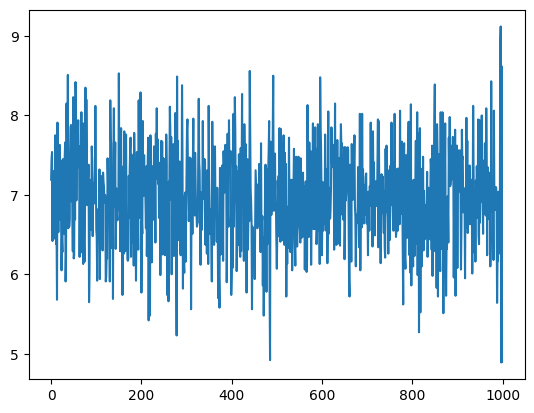

In [172]:
#line plot
plt.plot(a)

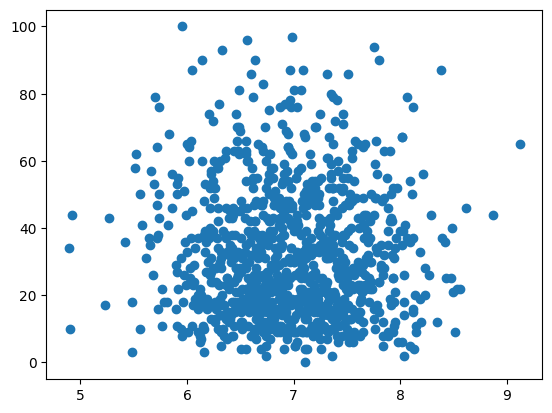

In [173]:
#scatter plot
plt.scatter(a,b)

<BarContainer object of 1000 artists>

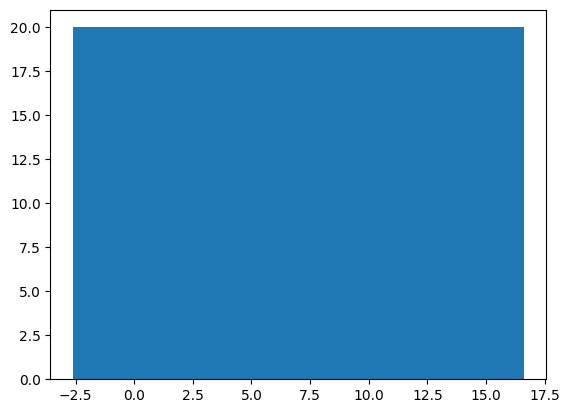

In [174]:
#bar plot
plt.bar(a,height=20,width=15)

(array([ 77., 238., 201., 183., 115.,  84.,  55.,  27.,  12.,   8.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

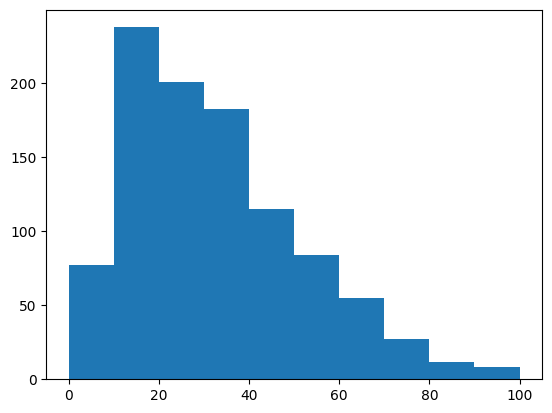

In [175]:
#histogram
plt.hist(b)

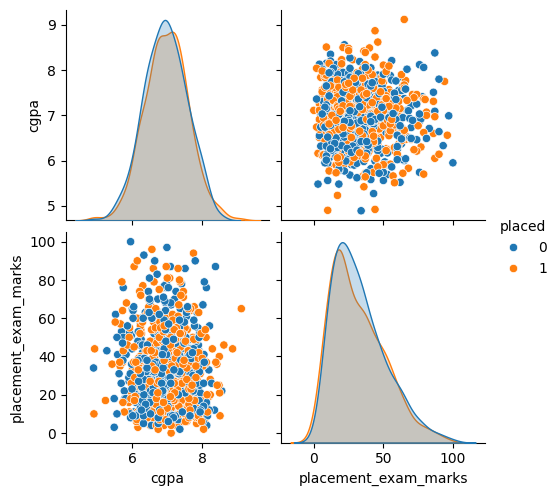

In [177]:
#pairplot
sns.pairplot(data=df,hue='placed')

<ipython-input-180-deea8d06988b>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
<ipython-input-180-deea8d06988b>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
<ipython-input-180-deea8d06988b>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seab

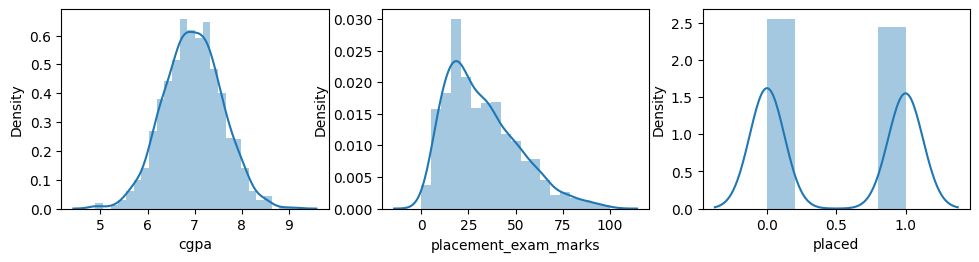

In [180]:
#distribution plot
plt.figure(figsize=(20,15))
plotnumber=1
for col in df.columns:
  if plotnumber<=3:
    plt.subplot(5,5,plotnumber)
    sns.distplot(df[col])
  plotnumber+=1
plt.show()

In [181]:
df['placement_exam_marks'].skew()

0.8356419499466834

In [182]:
#Normal_Distribution
print('Highest allowed=',df['cgpa'].mean()+3*df['cgpa'].std())
print('Lowest allowed=',df['cgpa'].mean()-3*df['cgpa'].std())

Highest allowed= 8.808933625397168
Lowest allowed= 5.113546374602832


METHOD 1

In [183]:
#find outlier
df[(df['cgpa']> 8.808933625397168)|(df['cgpa']< 5.113546374602832)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [184]:
#Trimming
df1=df[(df['cgpa']< 8.808933625397168)&(df['cgpa']> 5.113546374602832)]

In [185]:
df1.shape

(995, 3)

METHOD 2

In [186]:
#z-score
df['Z_score']=(df['cgpa']-df['cgpa'].mean())/df['cgpa'].std()
df

,cgpa,placement_exam_marks,placed,Z_score
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
998,8.62,46.0,1,2.693239


In [187]:
df[(df['Z_score']<-3) | (df['Z_score']>+3)]

,cgpa,placement_exam_marks,placed,Z_score
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [188]:
df2=df[(df['Z_score']>-3) & (df['Z_score']<+3)]
df2

,cgpa,placement_exam_marks,placed,Z_score
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


In [189]:
#capping
UpperLimit=df['cgpa'].mean()+3*df['cgpa'].std()
LowerLimit=df['cgpa'].mean()-3*df['cgpa'].std()

print(UpperLimit)
print(LowerLimit)

8.808933625397168
5.113546374602832


In [190]:
df['cgpa']=np.where(df['cgpa']>UpperLimit,UpperLimit,
           np.where(df['cgpa']<LowerLimit,LowerLimit,
           df['cgpa']))

In [191]:
df['cgpa']

0      7.190000
1      7.460000
2      7.540000
3      6.420000
4      7.230000
         ...   
995    8.808934
996    8.808934
997    5.113546
998    8.620000
999    5.113546
Name: cgpa, Length: 1000, dtype: float64

In [192]:
df.shape

(1000, 4)

SKEWED DATA

In [193]:
df.head()

,cgpa,placement_exam_marks,placed,Z_score
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [194]:
df=df.drop('Z_score',axis=1)

In [195]:
df

,cgpa,placement_exam_marks,placed
0,7.190000,26.0,1
1,7.460000,38.0,1
2,7.540000,40.0,1
3,6.420000,8.0,1
4,7.230000,17.0,0
...,...,...,...
995,8.808934,44.0,1
996,8.808934,65.0,1
997,5.113546,34.0,0
998,8.620000,46.0,1


<ipython-input-208-233be3442f41>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])
<ipython-input-208-233be3442f41>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])


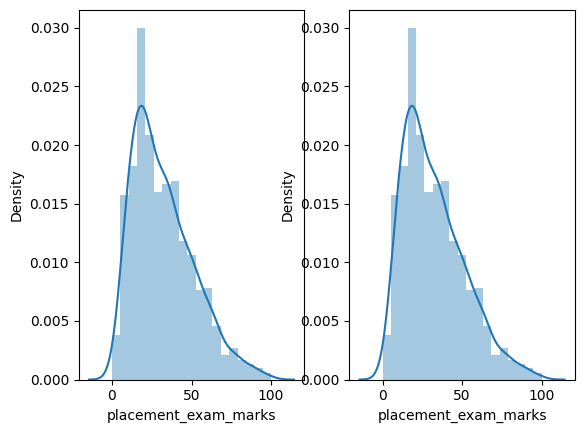

In [208]:
plt.subplot(1,2,1)
sns.distplot(df['placement_exam_marks'])
plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])
plt.show()

In [197]:
#Inter Quantile Range(IQR)
percentile25=df['placement_exam_marks'].quantile(0.25)
percentile75=df['placement_exam_marks'].quantile(0.75)

print(percentile25)
print(percentile75)

17.0
44.0


In [198]:
iqr=percentile75-percentile25
iqr

27.0

In [199]:
print(percentile25-1.5*iqr)
print(percentile75+1.5*iqr)

-23.5
84.5


In [204]:
df[(df['placement_exam_marks']<-23.5) | (df['placement_exam_marks']>84.5)]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [205]:
df3=df[(df['placement_exam_marks']>-23.5) & (df['placement_exam_marks']<84.5)]
df3

,cgpa,placement_exam_marks,placed
0,7.190000,26.0,1
1,7.460000,38.0,1
2,7.540000,40.0,1
3,6.420000,8.0,1
4,7.230000,17.0,0
...,...,...,...
995,8.808934,44.0,1
996,8.808934,65.0,1
997,5.113546,34.0,0
998,8.620000,46.0,1


In [202]:
df3.shape

(1000, 3)

<ipython-input-223-49cf4ff79826>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])
<ipython-input-223-49cf4ff79826>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3['placement_exam_marks'])


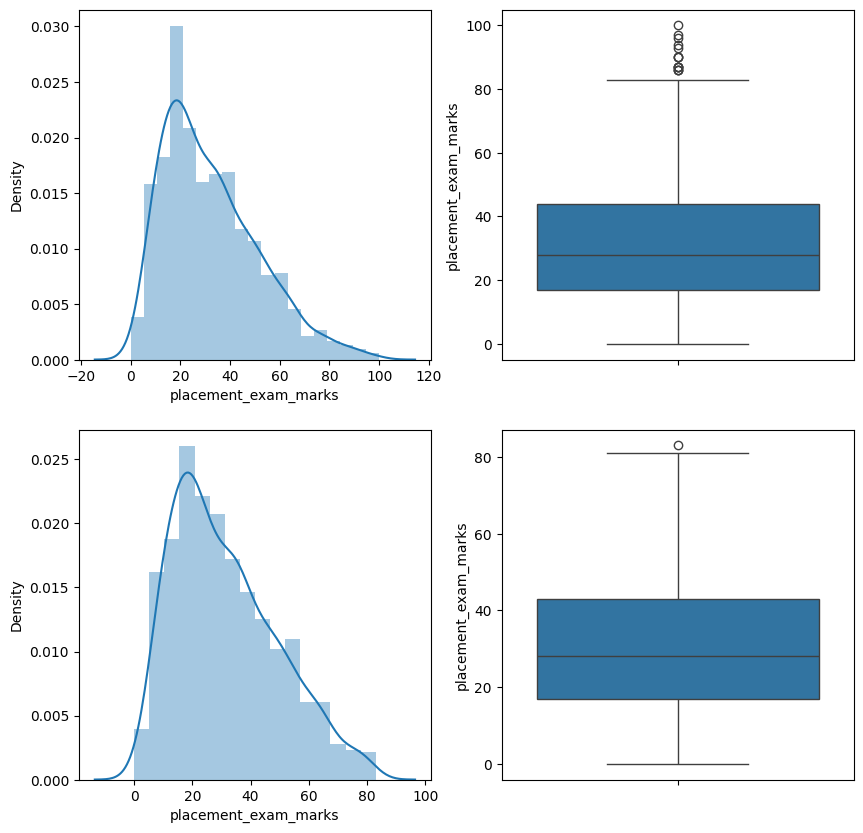

In [223]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])
plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])
plt.subplot(2,2,3)
sns.distplot(df3['placement_exam_marks'])
plt.subplot(2,2,4)
sns.boxplot(df3['placement_exam_marks'])
plt.show()